<a href="https://colab.research.google.com/github/NatyEsquenazi/Met-Camp-Data-2022/blob/main/Graduados_universitarios_del_sistema_Araucano_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Graduados universitarios del sistema Araucano (2016-2018)**

Base de datos que contiene, para el período 2019-2021, información sociolaboral de un conjunto de graduados de carreras universitarias de universidades argentinas entre 2016 y 2018.

https://datos.produccion.gob.ar/dataset/graduados-universitarios-del-sistema-araucano-2016-2018


**Problemática a investigar:**

La Secretaría de Políticas Universitarias (SPU) de la Nación nos contrata para analizar esta base de datos. El objetivo es focalizar políticas de empleo formal en las disciplinas y regiones con más dificultades de empleabilidad.


**Consideraciones generales del dataset**

La SPU clasifica a las carreras universitarias en cinco ramas que a su vez se dividen en 38 disciplinas y estas, a continuación, en 146 áreas. A los fines de garantizar el secreto estadístico, los datos publicados se muestran al nivel de desagregación de disciplina. Para aquellas personas que poseían más de una relación laboral en los meses analizados, se procedió a sumar sus ingresos y conservar la letra y tamaño de la empresa que mayor ingreso presentaba. 

**Cada fila es una persona graduada en 2016-2018 con su situación laboral en noviembre de 2019, 2020 y 2021.** De tal modo, cada persona aparece tres veces en la base. Si la persona apareciera en el SIPA en 2019 pero no en 2020 y 2021, los campos ligados a la situación ocupacional aparecerían en blanco (esto no significa que la persona no haya trabajado en esos años, sino que no lo hicieron como asalariadas formales). Todas las variables fueron codificadas. Se adjunta el diccionario para su identificación. El diccionario incluye un listado de áreas contenidas en cada disciplina.



**Recordemos el proceso de Análisis de Datos**

Llevaremos adelante los pasos 1, 2 y 3 para intentar dar respuesta a la problemática planteada.

<img src="https://raw.githubusercontent.com/yaninaiberra/DiploDatos2021/master/DS_Process.PNG" width="500">

# Importación de librerías

In [5]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
import missingno as msno
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Importar el datset

In [6]:
# Importar dataset
df = pd.read_csv('https://cdn.produccion.gob.ar/cdn-cep/araucano/base_araucano.csv') # Pesa 35MB, demora en subir a drive.

In [7]:
print(df.shape) # (cant. filas, cant. columnas)
df.head() # Muestra las primeras 5 líneas.

(820335, 13)


,id,rama_id,disciplina_id,tipo_titulo_id,gestion_id,genero_id,region_id,tamaño_id,letra_id,salario,anio,anioegreso,anionac
0,1,1,1,4,1,1,1,NaN,NaN,NaN,2019,2017,1976.0
1,1,1,1,4,1,1,1,NaN,NaN,NaN,2020,2017,1976.0
2,1,1,1,4,1,1,1,NaN,NaN,NaN,2021,2017,1976.0
3,2,1,1,4,1,1,2,NaN,NaN,NaN,2019,2018,1980.0
4,2,1,1,4,1,1,2,NaN,NaN,NaN,2020,2018,1980.0


**Descripción de los campos del dataset:**

Variable | Descripción
--------| :---        |
id | Código de identificación de cada persona graduada para su seguimiento a lo largo del tiempo. 
rama_id | Rama del conocimiento en la que se graduó la persona. 
disciplina_id | Disciplina en la que se graduó la persona.
tipo_titulo_id | Nivel alcanzado en la graduación de la persona (Tecnicatura, Posgrado, etc).
gestion_id | Tipo de gestión a la que pertenece el establecimiento del cual se graduó la persona (pública o privada).
genero_id | Género de la persona graduada.
tamaño_id | Tamaño de la empresa en la que la persona se encuentra trabajando en ese período. Este campo solo aparece en el caso de que la persona aparezca en el SIPA en el año de referencia.
letra_id | Sector productivo al cual pertenece la empresa en la que la persona se encuentra trabajando en ese período (a nivel letra de desagregación del CIIU Rev. 4). Este campo solo aparece en el caso de que la persona aparezca en el SIPA en el año de referencia.
salario | Remuneración bruta en pesos corrientes correspondiente al mes de noviembre. Este campo solo aparece en el caso de que la persona aparezca en el SIPA en el año de referencia.
anio | Año al que corresponden los datos de empleo.
anioegreso | Año en el que egresó la persona.
anionac | Año de nacimiento de la persona. Este campo tiene un pequeño porcentaje de valores missing en casos de falta de información.

<br>

Más info en: [MICRODATOS BASE ARAUCANO - METODOLOGÍA](https://datos.produccion.gob.ar/dataset/46df1ebe-d0bb-49a1-96dd-fe9751930682/resource/a2b14e98-9874-4b2a-b641-cdba6676de45/download/metodologia-araucano-da.pdf)


# Exploración de los tipos de datos

In [8]:
df.info() # Devuelve información (número de filas, número de columnas, índices, tipo de las columnas y memoria usado) sobre el DataFrame df.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820335 entries, 0 to 820334
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              820335 non-null  int64  
 1   rama_id         820335 non-null  int64  
 2   disciplina_id   820335 non-null  int64  
 3   tipo_titulo_id  820335 non-null  int64  
 4   gestion_id      820335 non-null  int64  
 5   genero_id       820335 non-null  int64  
 6   region_id       820335 non-null  int64  
 7   tamaño_id       478719 non-null  float64
 8   letra_id        478603 non-null  float64
 9   salario         478719 non-null  float64
 10  anio            820335 non-null  int64  
 11  anioegreso      820335 non-null  int64  
 12  anionac         819147 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 81.4 MB


Ver diccionario de datos: https://datos.produccion.gob.ar/dataset/46df1ebe-d0bb-49a1-96dd-fe9751930682/resource/2976f8e2-eb30-412f-a3cf-0a445452a037/download/diccionario.xlsx

Podemos ver que tenemos diferentes tipos de datos:
Numéricos (enteros y flotantes), pero entre los numéricos, viendo el diccionario de datos, concluimos que se tratan de datos categóricos representados por números.
Trabajaremos más adelante para agregar columnas que contengan el significado de cada categoría, ya que es importante tener la descripción del significado de los números para poder obtener conclusiones correctas.

<img src=https://i.pinimg.com/originals/66/44/aa/6644aa4e2b3637a26f571ddbde6623b6.jpg width="500">


# Medidas estadísticas descriptivas

❓ ¿Qué conclusiones podemos sacar de ésta tabla?



In [9]:
df.describe().T # El método "describe" devuelve un dataframe con información estadística de los datos del dataframe.

,count,mean,std,min,25%,50%,75%,max
id,820335.0,136723.000000,78936.820291,1.00,68362.000,136723.000,205084.00,273445.0
rama_id,820335.0,2.150261,1.198289,1.00,1.000,2.000,3.00,6.0
disciplina_id,820335.0,10.421990,8.207465,1.00,3.000,9.000,18.00,38.0
tipo_titulo_id,820335.0,2.751793,0.704808,1.00,3.000,3.000,3.00,4.0
gestion_id,820335.0,1.208930,0.406545,1.00,1.000,1.000,1.00,2.0
genero_id,820335.0,1.395619,0.488984,1.00,1.000,1.000,2.00,2.0
region_id,820335.0,2.812556,1.667966,1.00,2.000,3.000,3.00,7.0
tamaño_id,478719.0,3.566637,0.831108,1.00,3.000,4.000,4.00,4.0
letra_id,478603.0,8.352764,5.705372,1.00,2.000,10.000,13.00,20.0
salario,478719.0,99769.278182,101753.178049,0.01,46327.148,76264.422,124800.75,9518290.0


Como hay variables categóricas representadas por número, no tienen sentido las medidas estadísticas sobre dichos valores.
Pero si podemos observar otras medidas estadísticas que si tienen sentido, por ejemplo:

* Para la variable salario: tenemos una media de \$99769.27 y una mediana (50%) de \$76264.42. Es decir el 50% de los egresados tiene un ingreso inferior al salario promedio.
* También podemos observar un salario mín (\$0.01) y máx (\$9518290.0) que parecen ser valores extremos muy por debajo y por encima de los salarios promedio. Lo cual habría que analizar puntualmente para ver de qué tipos de empleos se trata y si hay un error allí.
* Se observa en el año de nacimiento, personas nacidas entre 1940 (min) y personas nacidas en 1999 (máx), teniendo en cuenta de que se trata de una base de datos de alumnos egesados de una universidad entre los años 2016 y 2018, habría que analizar los casos atípicos (2016-1940=76, suponiendo se egresó en el 2016, esa persona se habría egresado con aprox 76 años, es posible pero son casos extremos a analizar).



# Mapeo de variables categóricas

Ver diccionario de datos: https://datos.produccion.gob.ar/dataset/46df1ebe-d0bb-49a1-96dd-fe9751930682/resource/2976f8e2-eb30-412f-a3cf-0a445452a037/download/diccionario.xlsx

In [ ]:
# Rama
df['rama_id_map'] = df['rama_id'].map({1:'Ciencias Sociales', 
                                       2:'Ciencias Aplicadas', 
                                       3:'Ciencias de la Salud', 
                                       4:'Ciencias Humanas', 
                                       5:'Ciencias Básicas', 
                                       6:'Sin Rama'
                                       })
# Disciplina
df['disciplina_id_map'] = df['disciplina_id'].map({1:'Economía y Administración', 
                                                   2: 'Ingeniería',
                                                   3: 'Sociología, Antropología y Servicio Social',
                                                   4: 'Ciencias Agropecuarias',
                                                   5: 'Medicina',
                                                   6: 'Ciencias Políticas, Relaciones Internacionales y Diplomacia',
                                                   7: 'Derecho',
                                                   8: 'Artes',
                                                   9: 'Educación',
                                                   10: 'Informática',
                                                   11: 'Psicología',
                                                   12: 'Historia',
                                                   13: 'Arquitectura y Diseño',
                                                   14: 'Letras e Idiomas',
                                                   15: 'Meteorología',
                                                   16: 'Biología',
                                                   17: 'Bioquímica y Farmacia',
                                                   18: 'Paramédicas y Auxiliares de la Medicina',
                                                   19: 'Ciencias de la Información y de la Comunicación',
                                                   20: 'Filosofía',
                                                   21: 'Industrias',
                                                   22: 'Demografía y Geografía',
                                                   23: 'Ciencias del Suelo',
                                                   24: 'Relaciones Institucionales y Humanas',
                                                   25: 'Salud Pública',
                                                   26: 'Veterinaria',
                                                   27: 'Otras Ciencias Sociales',
                                                   28: 'Otras Ciencias Aplicadas', 
                                                   29: 'Odontología',
                                                   30: 'Física',
                                                   31: 'Sanidad',
                                                   32: 'Química',
                                                   33: 'Teología',
                                                   34: 'Matemática',
                                                   35: 'Estadística',
                                                   36: 'Astronomía',
                                                   37: 'Sin Disciplina',
                                                   38: 'Arqueología'
                                                   })
# Título
df['tipo_titulo_id_map'] = df['tipo_titulo_id'].map({1:'Pregrado y títulos intermedios',
                                                     2:'Tecnicatura',
                                                     3:'Grado y profesorado',
                                                     4:'Posgrado'
                                                     })
# Tipo de Gestión
df['gestion_id_map'] = df['gestion_id'].map({1:'Estatal',
                                             2:'Privada'
                                            })
# Género
df['genero_id_map'] = df['genero_id'].map({1:'Mujer', 
                                           2:'Varon'
                                           })
# Región
df['region_id_map'] = df['region_id'].map({1:'CABA', 
                                           2:'BUENOS AIRES',
                                           3:'RESTO PAMPEANA (SANTA FE, CORDOBA, ENTRE RIOS, LA PAMPA)', 
                                           4:'NOA',
                                           5:'NEA', 
                                           6:'CUYO',
                                           7: 'PATAGONIA'
                                           })
# Tamaño de empresa
df['tamanio_id_map'] = df['tamaño_id'].map({1:'Micro: menos de 10 empleados', 
                                           2:'Pequeña: 10 a 49 empleados',
                                           3:'Mediana: 50 a 199 empleados', 
                                           4:'Grande: 200 empleados o más'
                                           })
# Letra
df['letra_id_map'] = df['letra_id'].map({1:'Actividades administrativas y servicios de apoyo',
                                         2: 'Administración pública, defensa y seguridad social obligatoria',
                                         3: 'Agricultura, ganadería, caza, silvicultura y pesca',
                                         4: 'Suministro de agua, cloacas, gestión de residuos y recuperación de materiales y saneamiento público',
                                         5: 'Servicios de asociaciones y servicios personales',
                                         6: 'Comercio al por mayor y al por menor, reparación de vehículos automotores y motocicletas',
                                         7: 'Construcción',
                                         8: 'Servicios artísticos, culturales, deportivos y de esparcimiento',
                                         9: 'Suministro de electricidad, gas, vapor y aire acondicionado',
                                         10: 'Enseñanza',
                                         11: 'Intermediación financiera y servicios de seguros',
                                         12: 'Servicios de alojamiento y servicios de comida',
                                         13: 'Industria manufacturera',
                                         14: 'Información y comunicaciones',
                                         15: 'Explotación de minas y canteras',
                                         16: 'Salud humana y servicios sociales',
                                         17: 'Servicios de asociaciones y órganos extraterritoriales',
                                         18: 'Servicios inmobiliarios',
                                         19: 'Servicios profesionales, científicos y técnicos',
                                         20: 'Servicio de transporte y almacenamiento'
                                         })
df = df.drop(['rama_id', 'disciplina_id', 'tipo_titulo_id','gestion_id', 'genero_id', 'region_id', 'tamaño_id', 'letra_id'], axis=1)

In [54]:
# Verificamos las nuevas columnas
df.head()

,id,trabajo_salario,trabajo_anio,graduacion_anioegreso,anionac,graduacion_rama,graduacion_disciplina,graduacion_tipo_titulo,graduacion_gestion,genero,region,trabajo_tamanio,trabajo_sector_productivo,tuvo_trabajo,edad_aprox
0,1,NaN,2019,2017,1976.0,Ciencias Sociales,Economía y Administración,Posgrado,Estatal,Mujer,CABA,NaN,NaN,No,43.0
1,1,NaN,2020,2017,1976.0,Ciencias Sociales,Economía y Administración,Posgrado,Estatal,Mujer,CABA,NaN,NaN,No,44.0
2,1,NaN,2021,2017,1976.0,Ciencias Sociales,Economía y Administración,Posgrado,Estatal,Mujer,CABA,NaN,NaN,No,45.0
3,2,NaN,2019,2018,1980.0,Ciencias Sociales,Economía y Administración,Posgrado,Estatal,Mujer,BUENOS AIRES,NaN,NaN,No,39.0
4,2,NaN,2020,2018,1980.0,Ciencias Sociales,Economía y Administración,Posgrado,Estatal,Mujer,BUENOS AIRES,NaN,NaN,No,40.0


❓ ¿Qué notan en ésta vista previa de nuestro datos?


# Tratamiento de valores faltantes o nulos

<img src=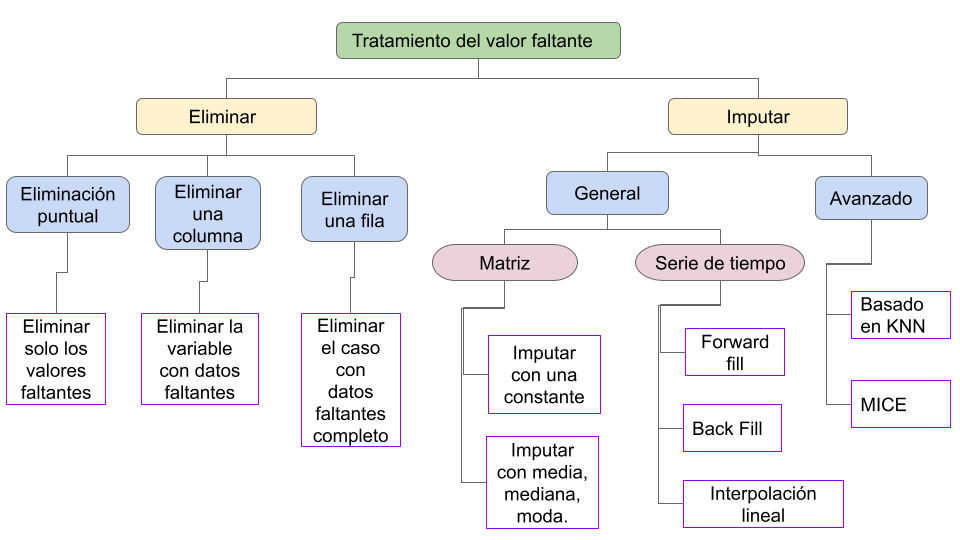 width="800">

**¿Cuántas filas con valores faltantes tenemos por cada columna?**

In [12]:
df.isnull().sum()

id                         0
salario               341616
anio                       0
anioegreso                 0
anionac                 1188
rama_id_map                0
disciplina_id_map          0
tipo_titulo_id_map         0
gestion_id_map             0
genero_id_map              0
region_id_map              0
tamanio_id_map        341616
letra_id_map          341732
dtype: int64

¿Esto representa pocos nulos o muchos? ¿Los podemos eliminar o sería mejor imputarlos?

**Porcentaje de valores faltantes con respecto al total de filas**

In [13]:
df.isnull().sum()/df.shape[0]*100

id                     0.000000
salario               41.643475
anio                   0.000000
anioegreso             0.000000
anionac                0.144819
rama_id_map            0.000000
disciplina_id_map      0.000000
tipo_titulo_id_map     0.000000
gestion_id_map         0.000000
genero_id_map          0.000000
region_id_map          0.000000
tamanio_id_map        41.643475
letra_id_map          41.657615
dtype: float64

Vemos que tenemos variables con nulos:

* anionac: 0.14% (No llega al 1%, por lo tanto es posible eliminar dichos casos).
* tamaño_id: 41.64% (Requiere un análisis más exhaustivo)
* letra_id: 41.65% (Requiere un análisis más exhaustivo)
* salario: 41.64% (Requiere un análisis más exhaustivo)

No es buena práctica eliminar un porcentaje tan alto de filas en los datos, ya que en éste caso representan más del 40%. Perderíamos mucha información.

Pero por ejemplo, si se tratara de un problema de predicción de salarios, es un dato primordial, que deberá imputarse de alguna manera (media, mediana, predicción KNN) o eliminarlos.


## Distribución de datos faltantes

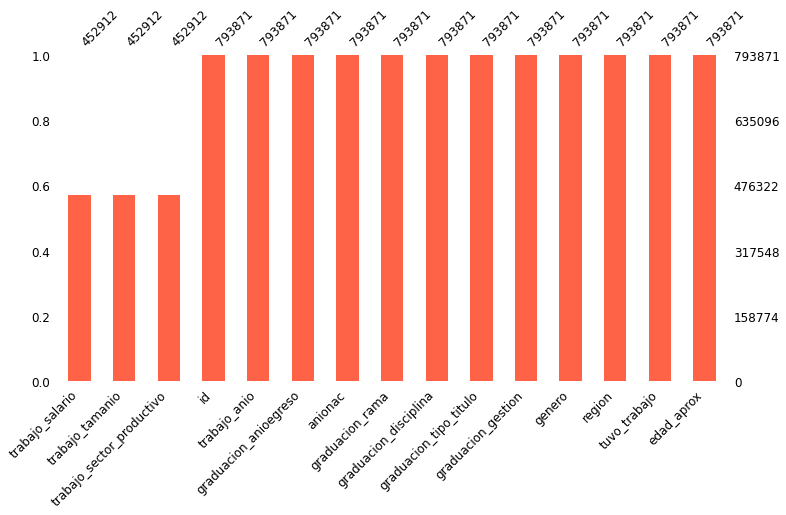

In [56]:
msno.bar(df,figsize=(12, 6), sort="ascending",fontsize=12, color='tomato');


Podemos ver que hay solo cinco columnas que no tienen todos sus valores: "letra_id_map", "tamaño_id_map", "salario" y "anionac", aunque "anionac" tiene muy pocos datos faltantes.

Tambien Podemos visualizar las posiciones en el dataset de los datos faltantes usando la matrix(). El gráfico aparece en blanco siempre que falten valores. Al ser 820335 casos, el gráfico esta muy comprimido.

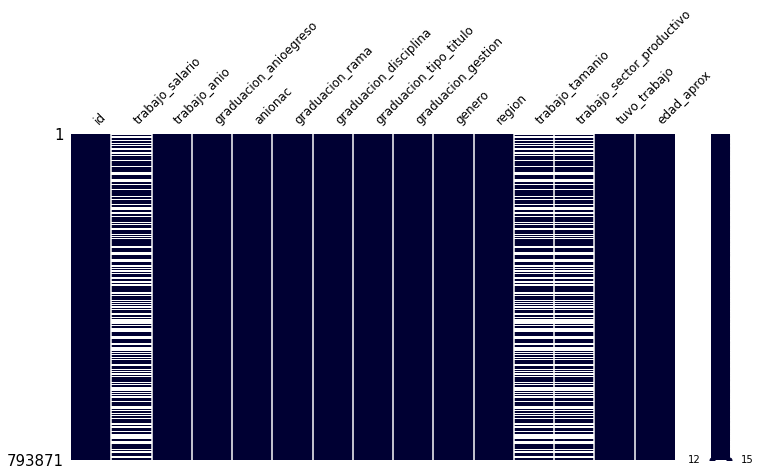

In [57]:
msno.matrix(df,figsize=(12, 6), fontsize=12, color=[0,0,0.2])


Se pueden observar las correlaciones entre los datos faltantes. Para poder accionar sobre el dataset sin incorporar nuevos errores, es necesario corroborar que el mecanismo de pérdida sea aleatorio.

La existencia de correlación entre datos faltantes en determinadas variables es una muestra de la falta de aleatoriedad del mecanismo de pérdida. Aun así, puede existir una relación entre las variables que permita imputar el dato perdido como función de los datos relevados.

Por ejemplo, "letra_id" significa "Sector productivo al cual pertenece la empresa en la que la persona se encuentra trabajando en ese período. Este campo solo aparece en el caso de que la persona aparezca en el SIPA en el año de referencia." Por lo tanto es correcto pensar en éstos campos como nulos y que también tenga nulos para esa misma persona(id) y año en el "salario". También tendrá nulos en el campo que hace referencia al tamaño de la empresa ("tamanio_id_map"), ya que no habrá dato de una empresa si no tuvo trabajo formal ese año.

Para éste caso, podemos agregar una nueva columna llamada "tuvo_trabajo" con el valor 'Si' si tuvo trabajo formal esa persona en ese año y "No" si esa persona no tuvo trabajo formal ese año. De ésta manera tendremos una columna que no tendrá nulos.

## Creación nueva columna "tuvo_trabajo"

In [58]:
df['tuvo_trabajo'] = np.where(df['salario'].isnull(), 'No', 'Si')

KeyError: ignored

In [ ]:
df.sample(5)

In [ ]:
df.isnull().sum()

In [ ]:
# Can. de personas con salario nulo: 341616
df[df['tuvo_trabajo']=='No'].shape[0]

## Manejo de nulos en "letra_id_map"

Vemos que la variable "letra_id_map", tiene más nulos que "salario" y "tamanio_id_map". Vamos a reemplazar los nulos con un valor de texto "Sin Dato", pero sólo para los casos donde si tiene completado el dato de "tamanio_id_map".

In [ ]:
df['letra_id_map'] = df[~df['tamanio_id_map'].isnull()][['letra_id_map']].replace(np.NaN, 'Sin Dato')

In [ ]:
df.isnull().sum()

## Eliminamos las filas con 'anionac' nulo

Recordemos que representaban el 0.14% (No llega al 1%, por lo tanto es posible eliminar dichos casos).

In [ ]:
df.dropna(subset=['anionac'], inplace=True)

In [ ]:
df.info() # Teníamos 820335 datos, eliminamos 1188, tendremos ahora: 819147 filas.

In [ ]:
df.isnull().sum()

# Manejo de valores atípicos (outliers)

Veamos las **distribuciones** de las variables numéricas.

Una distribución de frecuencias nos indica cuántas veces se observó cada categoría

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(df['salario'])
plt.ticklabel_format(style='plain', axis='x',useOffset=False) # Para evitar la notación científica en los salarios.

Veamos quiénes cobran más de $2,5millones.

In [ ]:
print(df[df['salario'] > 2500000].shape)
df[df['salario'] > 2500000]


No se observan casos raros a simple vista, y tampoco hay una única receta para manejar casos atípicos.
Si busamos guiarnos por el valor del Salario Mínimo Vital y Móvil para cada uno de esos años:
* 1 de octubre de 2019	16.875 ARS
* 1 de octubre de 2020	18.900 ARS
* 1 de octubre de 2021	32.000 ARS

Vemos que son muy bajos con respecto a los salarios de nuestro dataset.

Veamos entonces entre qué valores de salarios se concentra la mayor proporción de salarios, para ello utilizaremos un nuevo diagrama llamado de caja o boxplot.

## Percentiles y gráficos de caja o boxplots

Los gráficos de caja son otra forma de representar la distribución de las realizaciones de una v.a. numérica, de una forma más condensada que un histograma.

Son muy útiles para comparar muchas distribuciones, pero sólo cuando son muy distintas entre ellas, ya que oscurecen algunas sutilezas. Otros problema de este tipo de gráficos es que *no todo el mundo recuerda cómo leerlos*.

En estadística descriptiva, un gráfico de caja es un método para representar gráficamente grupos de datos numéricos a través de sus cuartiles. Los gráficos de caja también pueden tener líneas que se extienden verticalmente desde las cajas (bigotes) indicando la variabilidad fuera de los cuartiles superior e inferior. Los valores atípicos pueden representarse como puntos individuales.

La definición anterior sugiere que, si hay un valor atípico, se representará como un punto en el diagrama de caja, mientras que el resto de los datos de la muestra se agrupará y se mostrará en forma de cajas. Intentemos verlo nosotros mismos.
<center>
<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" height="300" />
</center>

Material extra: [Video - Percentiles y detección de outliers](https://www.youtube.com/watch?v=mAebZIYyVWM)

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=df['salario'])
plt.ticklabel_format(style='plain', axis='x',useOffset=False) # Para evitar la notación científica en los salarios.

Vamos a quedarnos con aquellos salarios menores a 2000000 (2millones) y que sean mayores al Salario Mínimo Vital y Movil del año 2019 (16.875 ARS)

In [ ]:
total_filas_antes = df[~df['salario'].isnull()].shape[0] # Contabilizamos las filas con salario no nulo
df = df[((df['salario']>= 16875) & (df['salario']< 2000000)) | df['salario'].isnull()]
total_filas_despues = df[~df['salario'].isnull()].shape[0] 

Veamos cuántas filas hemos eliminado y cómo quedan ahora la distribuciones de salarios.

In [ ]:
print("Filas eliminadas por tener salarios extremos: ", total_filas_antes - total_filas_despues)
print("Filas eliminadas por tener salarios extremos: ", round(((total_filas_antes - total_filas_despues)/ total_filas_antes) *100, 2), "%")

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(df['salario'])
plt.ticklabel_format(style='plain', axis='x',useOffset=False) # Para evitar la notación científica en los salarios.

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=df['salario'])
plt.ticklabel_format(style='plain', axis='x',useOffset=False) # Para evitar la notación científica en los salarios.

❓ ¿Qué pasos recuerdan que hemos hecho hasta ahora?


## Agregamos algunas columnas interesantes

Puede ser interesante en algunos casos crear nuevas columnas, o transformar algunas existentes, recordemos que ya hemos realizado los siguientes cambios:
* Eliminamos filas donde el año de nacimiento era nulo.
* Dejamos sólo los casos donde los salarios estuvieran entre: \$ 16875 y \$ 2000000.
* Agregamos una columna "tuvo_trabajo" con valor "Si" donde las personas (id) si tuvieron un trabajo para un año determinado. Y "No" en caso contrario. Para tener una columna que nos permita visibilizar el status laboral, y que no contenga nulos (porque teníamos en casos de no haber trabajado ese año, nulos en "letra_id_map", "tamaño_id_map" y "salario").
* Ahora calcularemos una columna de edad aproximada (ya que sólo tenemos el año de nacimiento y no el día y el mes), lo calcularemos con respecto al año laboral (variable 'anio') para saber cuántos años tenía en ese momento.

In [62]:
df.isnull().sum()

id                                0
trabajo_salario              340959
trabajo_anio                      0
graduacion_anioegreso             0
anionac                           0
graduacion_rama                   0
graduacion_disciplina             0
graduacion_tipo_titulo            0
graduacion_gestion                0
genero                            0
region                            0
trabajo_tamanio              340959
trabajo_sector_productivo    340959
tuvo_trabajo                      0
edad_aprox                        0
dtype: int64

In [ ]:
df['edad_aprox'] = df['anio'] - df['anionac']

In [ ]:
df.sample(5)

# Análisis Exploratorio de Datos

Primero vamos a renombrar las columnas que tienen que ver con la graduación, para que sea más fácil de interpretar:
* 'rama_id': Rama del conocimiento en la que se graduó la persona.
* 'disciplina_id': Disciplina en la que se graduó la persona.
* 'gestion_id': Tipo de gestión a la que pertenece el establecimiento del cual se graduó la persona (pública o privada).
* 'anioegreso': Año en el que egresó la persona.
* 'tipo_titulo_id': Nivel alcanzado en la graduación de la persona (Tecnicatura, Posgrado, etc).

También vamos a renombrar aquellas quetienen que ver con los trabajos de los egresados:
* 'tamaño_id': Tamaño de la empresa en la que la persona se encuentra trabajando en ese período. Este campo solo aparece en el caso de que la persona aparezca en el SIPA en el año de referencia.
* 'letra_id': Sector productivo al cual pertenece la empresa en la que la persona se encuentra trabajando en ese período. Este campo solo aparece en el caso de que la persona aparezca en el SIPA en el año de referencia.
* 'salario': Remuneración bruta en pesos corrientes correspondiente al mes de noviembre. Este campo solo aparece en el caso de que la persona aparezca en el SIPA en el año de referencia.
* 'anio':	Año al que corresponden los datos de empleo.


Ver algún ejemplo donde tenga pocos datos y la media no sea representativa

In [64]:
df.rename(columns = {'rama_id_map':'graduacion_rama', 
                     'disciplina_id_map':'graduacion_disciplina',
                     'gestion_id_map':'graduacion_gestion',                    
                     'anioegreso':'graduacion_anioegreso',
                     'tipo_titulo_id_map': 'graduacion_tipo_titulo',
                     'tamanio_id_map':'trabajo_tamanio',
                     'letra_id_map':'trabajo_sector_productivo',
                     'salario':'trabajo_salario',
                     'anio':'trabajo_anio',
                     'genero_id_map': 'genero',
                     'region_id_map': 'region'
                     }, inplace = True)

In [65]:
df.columns

Index(['id', 'trabajo_salario', 'trabajo_anio', 'graduacion_anioegreso',
       'anionac', 'graduacion_rama', 'graduacion_disciplina',
       'graduacion_tipo_titulo', 'graduacion_gestion', 'genero', 'region',
       'trabajo_tamanio', 'trabajo_sector_productivo', 'tuvo_trabajo',
       'edad_aprox'],
      dtype='object')

**Repasemos porqué estamos analizando éste dataset y qué buscamos**

La Secretaría de Políticas Universitarias (SPU) de la Nación nos contrata para analizar esta base de datos. El objetivo es focalizar políticas de empleo formal en las disciplinas y regiones con más dificultades de empleabilidad.

_Consideraciones generales del dataset:_

La SPU clasifica a las carreras universitarias en cinco ramas que a su vez se dividen en 38 disciplinas y estas, a continuación, en 146 áreas. A los fines de garantizar el secreto estadístico, los datos publicados se muestran al nivel de desagregación de disciplina. Para aquellas personas que poseían más de una relación laboral en los meses analizados, se procedió a sumar sus ingresos y conservar la letra y tamaño de la empresa que mayor ingreso presentaba.

Cada fila es una persona graduada en 2016-2018 con su situación laboral en noviembre de 2019, 2020 y 2021. De tal modo, cada persona aparece tres veces en la base. Si la persona apareciera en el SIPA en 2019 pero no en 2020 y 2021, los campos ligados a la situación ocupacional aparecerían en blanco (esto no significa que la persona no haya trabajado en esos años, sino que no lo hicieron como asalariadas formales).

❓ 
**En base a esta problemática, ¿qué preguntas nos podemos hacer en cuánto a los datos?**

* .
* .
* .
* .
* .
* .
* .
* .
* .
* .





* ¿Existe algún comportamiento diferenciado entre los egresados por año y género?
* ¿Los graduados consiguen trabajo formal en los próximos 3 años de su egreso?
* Analizar los dos grupos: quienes SI consiguieron al menos un trabajo, y ninguno (cómo estan compuestos los grupos en cuanto a las variables categóricas: región, disciplinas y en cuanto a edades, salario).

## Egresados por año y género. 

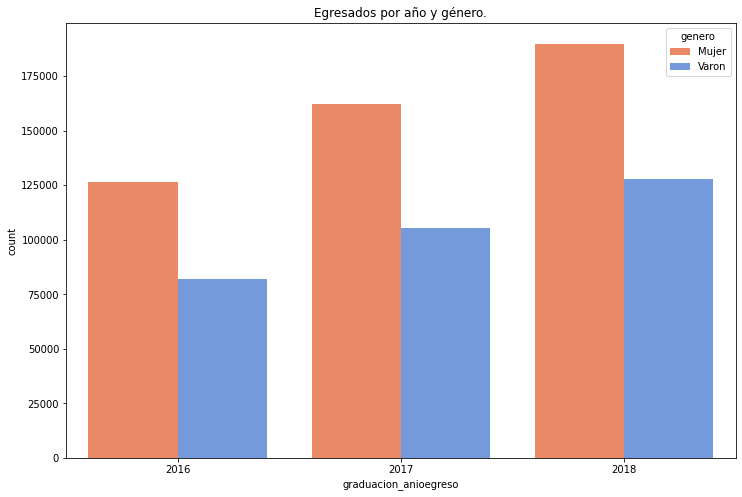

In [66]:
plt.figure(figsize=(12, 8))
sns.countplot(x = 'graduacion_anioegreso',
            hue = 'genero',
            data = df,
            palette=["#FF7F50", "#6495ED"]
            ).set(title='Egresados por año y género.');

**Observaciones:**
* Podemos observar una relación creciente en la cantidad de ingresos por año, tanto para mujeres como para varones.
* Se visualiza también que para todos los años de egreso presentes en el dataset, la cantidad de egresadas mujeres es mayor a la de varones.

Veamos cuáles son las carreras de los hombres y cuáles de las mujeres. ¿Qué campos tenemos?:
- Rama
- Disciplina
- Gestion (universidad privada o pública)

**Egresados por género y rama**

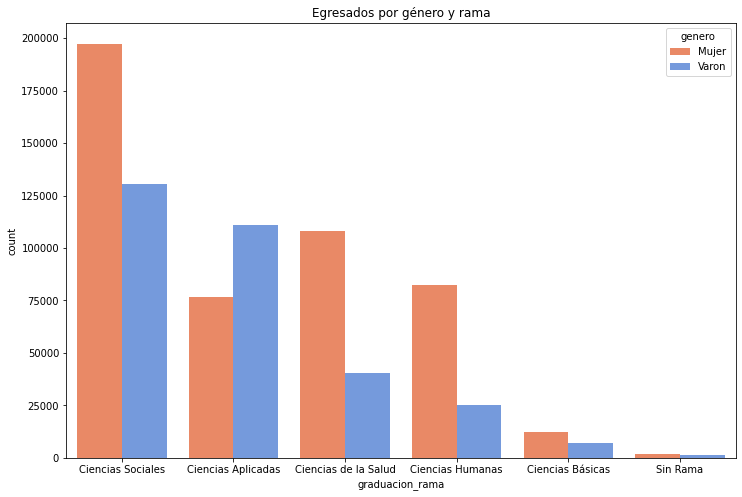

In [67]:
plt.figure(figsize=(12, 8))
sns.countplot(x = 'graduacion_rama',
            hue = 'genero',
            data = df,
            palette=["#FF7F50", "#6495ED"]
            ).set(title='Egresados por género y rama');

**Observaciones:**

* Vemos que en todas las ramas, las mujeres son mayoría en cuanto a cantidad de egresos, salvo en "Ciencias Aplicadas", donde hay mayoría de hombres. Lo cual puede ser un indicador de que hay que implementar alguna política o mecanismos para fomentar las inscripciones de hombres en las otras ramas.

**Ejercicio 1: Elabore un gráfico donde se visualice la cantidad de egresados por género y disciplina**


In [68]:
#plt.figure(figsize=(20, 8))
#sns...

#plt.xticks(rotation=90); # Para que los labels del eje x se roten y tener mejor legibilidad

**Observaciones:**
* ...
* ...

**Ejercicio 2: Elabore un gráfico donde se visualice la cantidad de egresados por género y gestion (privada o estatal)**

In [69]:
#plt.figure(figsize=(12, 8))
#sns....

**Ejercicio 3: Elabore un gráfico donde se visualice la cantidad de egresados por género y tipo de título (Tecnicatura, Posgrado)**

In [70]:
#plt.figure(figsize=(12, 8))
#sns.....

**Observaciones:**
* ...
* ...

## ¿Los graduados consiguen trabajo formal en los próximos 3 años de su egreso?

¿Qué campos tenemos?

* trabajo_salario
* trabajo_anio
* trabajo_tamanio
* trabajo_sector_productivo
* tuvo_trabajo

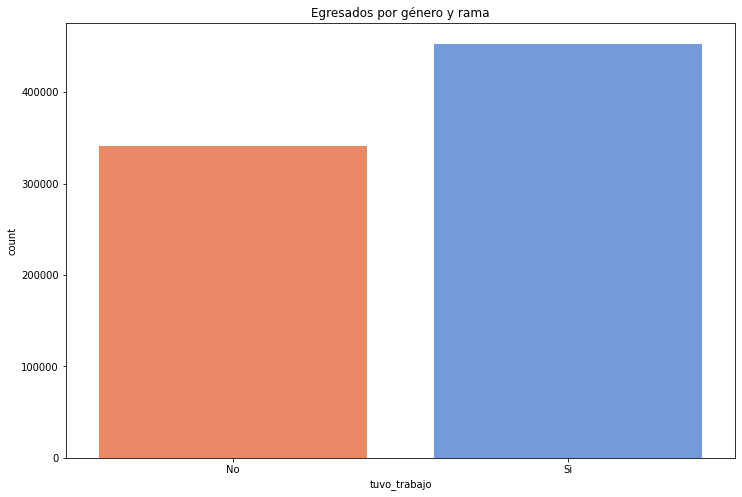

In [71]:
plt.figure(figsize=(12, 8))
sns.countplot(x = 'tuvo_trabajo',
            #hue = 'genero',
            data = df,
            palette=["#FF7F50", "#6495ED"],
            ).set(title='Egresados por género y rama');

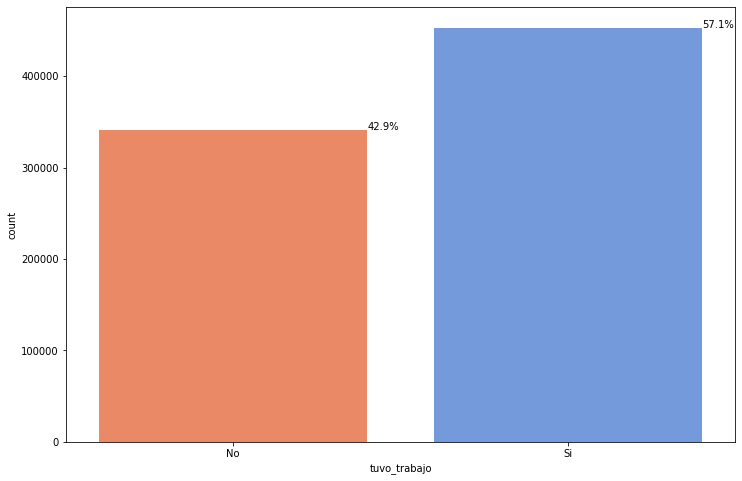

In [72]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = 'tuvo_trabajo',
            #hue = 'genero',
            data = df,
            palette=["#FF7F50", "#6495ED"],
            )
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y))

❓ **¿Qué notan en éste gráfico?**

**Observaciones:**
* ...
* ..


### **¿Podemos identificar diferencias entre quienes si consiguieron trabajo y quiénes no?** 

Veamos por ejemplo cómo se compone cada grupo con respecto a variables que tengan que ver con lo estudiado o datos de la persona (ya que datos de empresas y trabajo sólo existen para la población que sí ha tenido trabajo).

### Ramas de estudio por egresados con y sin trabajo formal

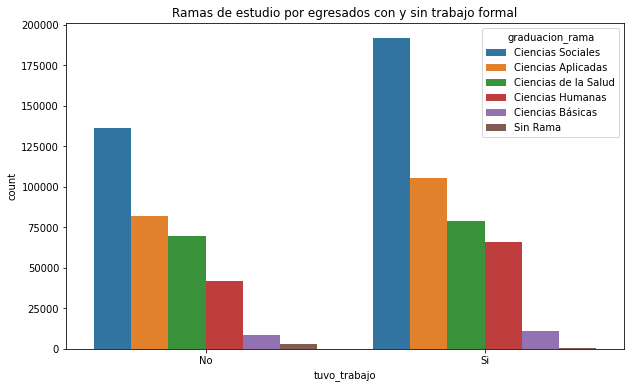

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'tuvo_trabajo',
            hue = 'graduacion_rama',
            data = df,
            ).set(title='Ramas de estudio por egresados con y sin trabajo formal');

**Observaciones:**
* ...
* ..


**Ejercicio 4: Elabore un gráfico donde se visualicen los tipos de gestión de las universidades de los egresados con y sin trabajo formal**


In [74]:
#plt.figure(figsize=(10, 6))
#sns.countplot(x = '...',
#            hue = '...',
#            data = df,
#            ).set(title='...');

### Disciplinas de estudio por egresados con y sin trabajo formal

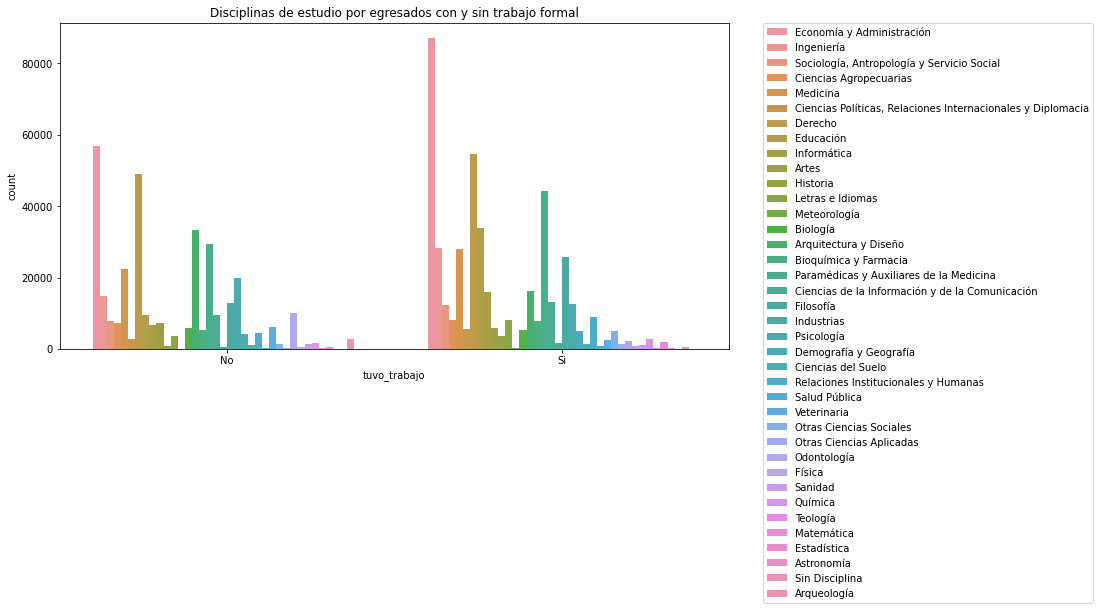

In [75]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'tuvo_trabajo',
            hue = 'graduacion_disciplina',
            data = df,
            ).set(title='Disciplinas de estudio por egresados con y sin trabajo formal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

**Observaciones:**
* ...
* ..


### Edades promedio por egresados con y sin trabajo formal

In [76]:
df['edad_aprox'].min(), df['edad_aprox'].max()

(20.0, 81.0)

In [77]:
print("Edad promedio de los egresados que SI consiguieron trabajo formal: ", round(df[df['tuvo_trabajo'] == 'Si']['edad_aprox'].mean(), 2))
print("Edad promedio de los egresados que NO consiguieron trabajo formal", round(df[df['tuvo_trabajo'] == 'No']['edad_aprox'].mean(), 2))

Edad promedio de los egresados que SI consiguieron trabajo formal:  34.34
Edad promedio de los egresados que NO consiguieron trabajo formal 32.05


[Text(0.5, 1.0, 'Edades promedio de los egresados con y sin trabajo formal')]

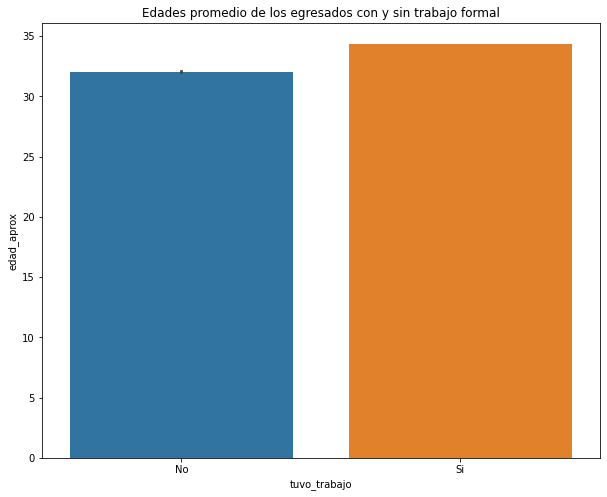

In [78]:
plt.figure(figsize=(10, 8))
sns.barplot(x = 'tuvo_trabajo',
              y = 'edad_aprox',
            data = df,
            ).set(title='Edades promedio de los egresados con y sin trabajo formal')

In [79]:
print("Edad promedio de los egresados que SI consiguieron trabajo formal: ", round(df[df['tuvo_trabajo'] == 'Si']['edad_aprox'].median(), 2))
print("Edad promedio de los egresados que NO consiguieron trabajo formal", round(df[df['tuvo_trabajo'] == 'No']['edad_aprox'].median(), 2))

Edad promedio de los egresados que SI consiguieron trabajo formal:  32.0
Edad promedio de los egresados que NO consiguieron trabajo formal 30.0


### Edades por egresados con y sin trabajo formal

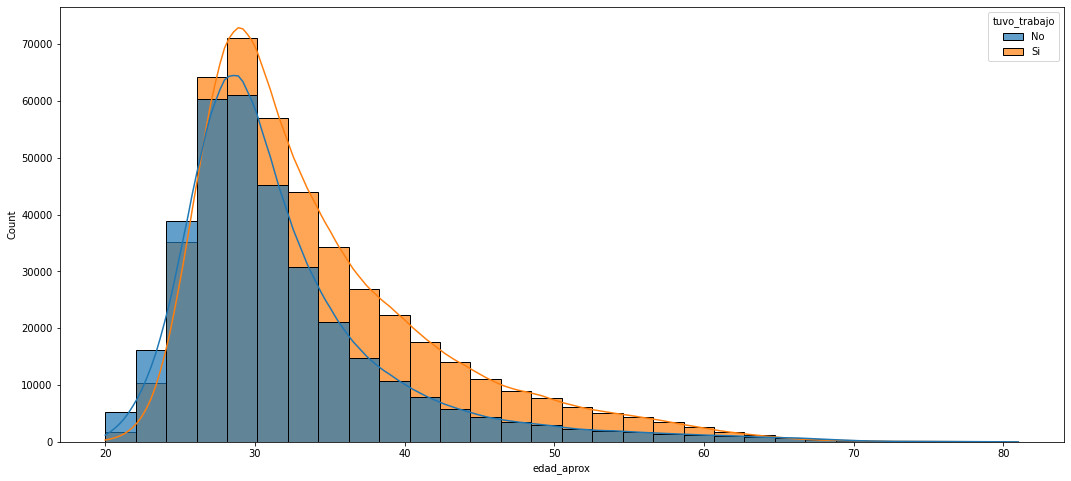

In [80]:
plt.figure(figsize=(18, 8))
sns.histplot(df,
            x = "edad_aprox",
            hue = 'tuvo_trabajo',
            bins=30, kde = True, alpha = 0.7)
plt.ticklabel_format(style='plain', axis='x',useOffset=False) # Para evitar la notación científica en los salarios.

**Observaciones:**
* ...
* ..


## Salarios

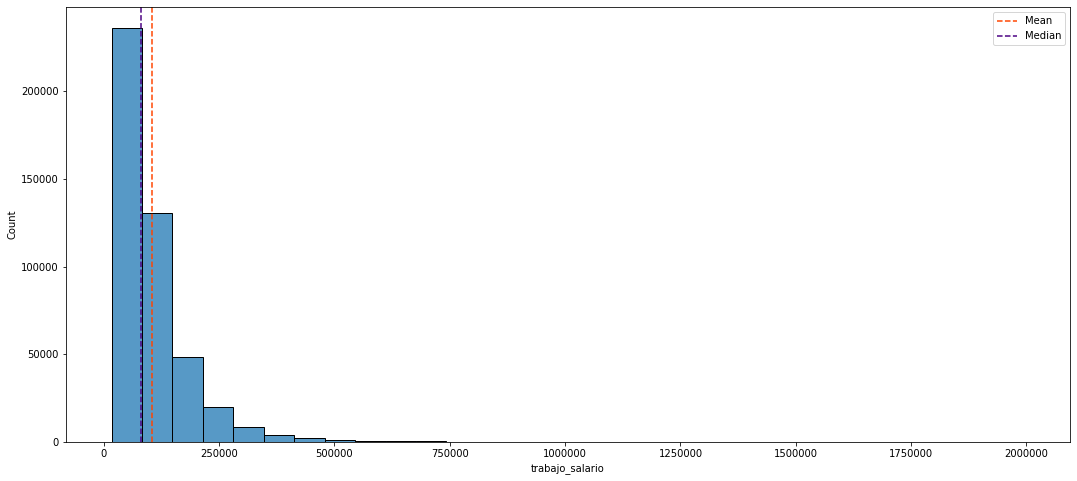

In [81]:
plt.figure(figsize=(18, 8))
sns.histplot(df,
            x = "trabajo_salario",
            bins=30)
plt.axvline(x=df.trabajo_salario.mean(), color='orangered', ls='--')
plt.axvline(x=df.trabajo_salario.median(), color='indigo', ls='--')
plt.ticklabel_format(style='plain', axis='x',useOffset=False) # Para evitar la notación científica en los salarios.
plt.legend(labels=["Mean","Median"]);

**Observaciones:**
* ...
* ..


